In [2]:
# Step 1: Load the dataset (run this in Google Colab)

# If seaborn is missing uncomment the next line:
# !pip install seaborn

import pandas as pd
import seaborn as sns

# Load Titanic dataset (built-in in seaborn)
df = sns.load_dataset('titanic')   # target column: 'survived' (0 or 1)

# Quick checks
print("Dataset loaded. Shape (rows, cols):", df.shape)
display(df.head())    # show first 5 rows
display(df.info())    # shows column names, dtypes, non-null counts


Dataset loaded. Shape (rows, cols): (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

In [3]:
# Step 2: Data Cleaning and Preprocessing

# Drop columns that are not useful for prediction
df = df.drop(columns=["deck", "embark_town", "class", "alive", "adult_male", "who"])

# Handle missing values
df["age"].fillna(df["age"].median(), inplace=True)   # Replace missing age with median
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)  # Replace missing embark with most common

# Convert categorical columns to numeric (for model)
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["embarked"] = df["embarked"].map({"S": 0, "C": 1, "Q": 2})

# Verify cleaned data
print("✅ Data cleaned successfully!")
display(df.head())
print("\nMissing values after cleaning:\n", df.isnull().sum())


✅ Data cleaned successfully!


/tmp/ipython-input-2290807420.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)   # Replace missing age with median
/tmp/ipython-input-2290807420.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,0,22.0,1,0,7.2500,0,False
1,1,1,1,38.0,1,0,71.2833,1,False
2,1,3,1,26.0,0,0,7.9250,0,True
3,1,1,1,35.0,1,0,53.1000,0,False
4,0,3,0,35.0,0,0,8.0500,0,True



Missing values after cleaning:
 survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
dtype: int64


In [4]:
# Step 3: Feature and Target Selection + Data Splitting

from sklearn.model_selection import train_test_split

# Define the target (what we want to predict)
y = df["survived"]    # Target variable

# Define the features (what we use to predict)
X = df.drop(columns=["survived"])   # All other columns

# Split the data — 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data successfully split!")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


✅ Data successfully split!
Training set size: (712, 8)
Testing set size: (179, 8)


In [5]:
# Step 4: Model Training

from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)

# Train (fit) the model on training data
model.fit(X_train, y_train)

print("✅ Model training complete!")


✅ Model training complete!


In [6]:
# Step 5: Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict outcomes on test data
y_pred = model.predict(X_test)

# Evaluation metrics
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.7988826815642458

✅ Confusion Matrix:
 [[90 15]
 [21 53]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



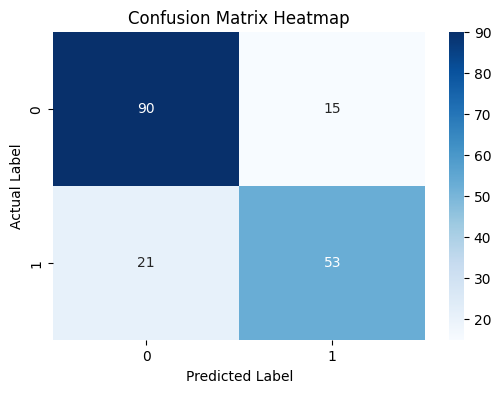

In [7]:
# Step 6: Visualize Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


In [9]:
# Step 7: Predicting new unseen passengers (Titanic example)

# New imaginary passengers (same columns used in training)
new_data = pd.DataFrame({
    'pclass': [1, 3, 2],
    'sex': [0, 1, 0],       # 0 = male, 1 = female
    'age': [25, 35, 50],
    'sibsp': [0, 1, 0],
    'parch': [0, 0, 1],
    'fare': [80, 10, 30],
    'embarked': [0, 2, 1],
    'alone': [1, 0, 0]
})

# Predict using trained model
predictions = model.predict(new_data)
print("✅ Predicted survival (1 = Survived, 0 = Not survived):", predictions)


✅ Predicted survival (1 = Survived, 0 = Not survived): [0 1 0]
